# Hand Written Digit Prediction - Classification Analysis

In [2]:
import pandas as pd

In [3]:
import numpy as np

In [7]:
import matplotlib

In [9]:
import matplotlib.pyplot as plt

# Objective

The objectivel is to achieve high accuracy and reliability in classifying handwritten digits, enabling applications in various fields such as postal mail sorting, bank check processing, and digit recognition in educational tools. This project aims to contribute to the advancement of optical character recognition (OCR) technology and its applications in real-world scenarios.

# Import Library

In [10]:
from sklearn.datasets import load_digits

# Import Data

In [11]:
df = load_digits()

# Describe Data

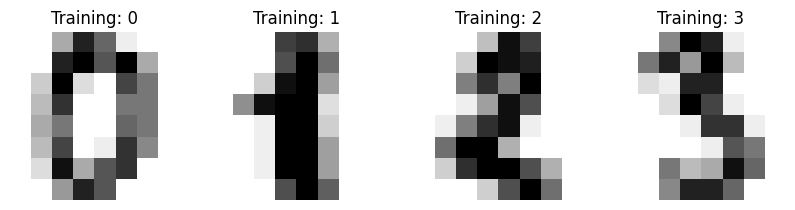

In [14]:
_, axes = plt.subplots(nrows=1, ncols=4, figsize=(10, 3))
for ax, image, label in zip(axes, df.images, df.target):
    ax.set_axis_off()
    ax.imshow(image, cmap=plt.cm.gray_r, interpolation="nearest")
    ax.set_title("Training: %d" % label)

# Data Preprocessing

In [15]:
df.images.shape

(1797, 8, 8)

In [17]:
df.images[0]

array([[ 0.,  0.,  5., 13.,  9.,  1.,  0.,  0.],
       [ 0.,  0., 13., 15., 10., 15.,  5.,  0.],
       [ 0.,  3., 15.,  2.,  0., 11.,  8.,  0.],
       [ 0.,  4., 12.,  0.,  0.,  8.,  8.,  0.],
       [ 0.,  5.,  8.,  0.,  0.,  9.,  8.,  0.],
       [ 0.,  4., 11.,  0.,  1., 12.,  7.,  0.],
       [ 0.,  2., 14.,  5., 10., 12.,  0.,  0.],
       [ 0.,  0.,  6., 13., 10.,  0.,  0.,  0.]])

In [18]:
df.images[0].shape

(8, 8)

In [19]:
len(df.images)

1797

In [21]:
n_samples = len(df.images)
data = df.images.reshape((n_samples, -1))

In [22]:
data[0]

array([ 0.,  0.,  5., 13.,  9.,  1.,  0.,  0.,  0.,  0., 13., 15., 10.,
       15.,  5.,  0.,  0.,  3., 15.,  2.,  0., 11.,  8.,  0.,  0.,  4.,
       12.,  0.,  0.,  8.,  8.,  0.,  0.,  5.,  8.,  0.,  0.,  9.,  8.,
        0.,  0.,  4., 11.,  0.,  1., 12.,  7.,  0.,  0.,  2., 14.,  5.,
       10., 12.,  0.,  0.,  0.,  0.,  6., 13., 10.,  0.,  0.,  0.])

In [24]:
data[0].shape

(64,)

In [25]:
data.shape

(1797, 64)

# Scaling Image Data

In [26]:
data.min()

0.0

In [27]:
data.max()

16.0

In [28]:
data = data/16

In [30]:
data.min()

0.0

In [31]:
data.max()

1.0

In [32]:
data[0]

array([0.    , 0.    , 0.3125, 0.8125, 0.5625, 0.0625, 0.    , 0.    ,
       0.    , 0.    , 0.8125, 0.9375, 0.625 , 0.9375, 0.3125, 0.    ,
       0.    , 0.1875, 0.9375, 0.125 , 0.    , 0.6875, 0.5   , 0.    ,
       0.    , 0.25  , 0.75  , 0.    , 0.    , 0.5   , 0.5   , 0.    ,
       0.    , 0.3125, 0.5   , 0.    , 0.    , 0.5625, 0.5   , 0.    ,
       0.    , 0.25  , 0.6875, 0.    , 0.0625, 0.75  , 0.4375, 0.    ,
       0.    , 0.125 , 0.875 , 0.3125, 0.625 , 0.75  , 0.    , 0.    ,
       0.    , 0.    , 0.375 , 0.8125, 0.625 , 0.    , 0.    , 0.    ])

# Train test Split Data

In [33]:
from sklearn.model_selection import train_test_split

In [36]:
X_train, X_test, y_train, y_test = train_test_split(data, df.target, test_size=0.3)

In [37]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((1257, 64), (540, 64), (1257,), (540,))

# Random Forest Model

In [38]:
from sklearn.ensemble import RandomForestClassifier

In [40]:
rf = RandomForestClassifier()

In [41]:
rf.fit(X_train, y_train)
RandomForestClassifier()

RandomForestClassifier()

# Prediction

In [42]:
y_pred = rf.predict(X_test)

In [43]:
y_pred

array([1, 6, 8, 1, 3, 5, 3, 8, 4, 2, 4, 1, 1, 2, 1, 2, 5, 0, 1, 0, 7, 4,
       0, 4, 6, 5, 4, 7, 3, 0, 7, 5, 9, 5, 8, 3, 8, 4, 5, 6, 6, 9, 7, 6,
       5, 8, 2, 7, 0, 9, 8, 1, 0, 4, 5, 1, 1, 9, 5, 2, 7, 7, 6, 0, 5, 1,
       2, 5, 9, 4, 9, 7, 1, 8, 0, 5, 9, 8, 7, 2, 7, 1, 9, 6, 6, 9, 5, 7,
       3, 1, 3, 4, 5, 0, 0, 2, 3, 9, 1, 3, 1, 4, 0, 6, 3, 8, 4, 4, 3, 6,
       3, 2, 3, 4, 3, 6, 4, 0, 4, 3, 6, 4, 1, 9, 3, 5, 8, 5, 3, 7, 7, 6,
       5, 9, 6, 4, 9, 0, 4, 8, 9, 0, 1, 3, 8, 7, 9, 3, 8, 1, 5, 4, 8, 0,
       9, 5, 4, 9, 1, 1, 3, 3, 7, 7, 1, 1, 4, 3, 8, 2, 5, 6, 9, 4, 6, 0,
       3, 3, 2, 6, 7, 2, 8, 1, 5, 1, 1, 0, 9, 0, 5, 7, 2, 3, 7, 1, 7, 4,
       4, 3, 9, 6, 4, 5, 7, 5, 0, 2, 4, 8, 0, 8, 8, 2, 5, 6, 3, 3, 0, 4,
       8, 7, 2, 3, 3, 1, 7, 7, 9, 8, 0, 4, 4, 7, 2, 8, 4, 4, 3, 1, 3, 5,
       6, 1, 2, 9, 0, 2, 6, 8, 2, 5, 3, 4, 3, 3, 3, 4, 5, 6, 0, 2, 4, 6,
       1, 5, 6, 1, 5, 2, 6, 2, 2, 4, 2, 5, 7, 3, 9, 4, 4, 5, 8, 3, 2, 0,
       0, 1, 6, 2, 6, 9, 9, 9, 9, 0, 5, 1, 8, 4, 9,

# Model Accuracy

In [45]:
from sklearn.metrics import confusion_matrix, classification_report

In [46]:
confusion_matrix(y_test, y_pred)

array([[52,  0,  0,  0,  1,  0,  0,  0,  0,  0],
       [ 0, 62,  0,  0,  0,  0,  0,  0,  0,  0],
       [ 0,  0, 48,  0,  0,  0,  0,  0,  0,  0],
       [ 0,  0,  0, 59,  0,  2,  0,  0,  0,  0],
       [ 0,  0,  0,  0, 54,  0,  0,  1,  0,  1],
       [ 0,  0,  0,  0,  0, 57,  0,  0,  1,  3],
       [ 0,  1,  0,  0,  0,  0, 53,  0,  0,  0],
       [ 0,  0,  0,  0,  1,  0,  0, 45,  0,  1],
       [ 0,  2,  0,  0,  1,  0,  0,  0, 48,  1],
       [ 0,  0,  0,  0,  0,  0,  0,  0,  1, 45]])

In [47]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       1.00      0.98      0.99        53
           1       0.95      1.00      0.98        62
           2       1.00      1.00      1.00        48
           3       1.00      0.97      0.98        61
           4       0.95      0.96      0.96        56
           5       0.97      0.93      0.95        61
           6       1.00      0.98      0.99        54
           7       0.98      0.96      0.97        47
           8       0.96      0.92      0.94        52
           9       0.88      0.98      0.93        46

    accuracy                           0.97       540
   macro avg       0.97      0.97      0.97       540
weighted avg       0.97      0.97      0.97       540

